# **Liver Disease Prediction Using Machine Learning**

### Installing all Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from matplotlib.colors import ListedColormap

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from math import sqrt

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

### Machine Learning Models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.svm import SVC

In [17]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [19]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance

In [20]:
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

In [21]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [22]:
df.shape

(30691, 11)

In [23]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

### Data Filtering

In [24]:
df.dtypes[df.dtypes=='object']

Gender of the patient    object
dtype: object

### Distribution of Numerical Features

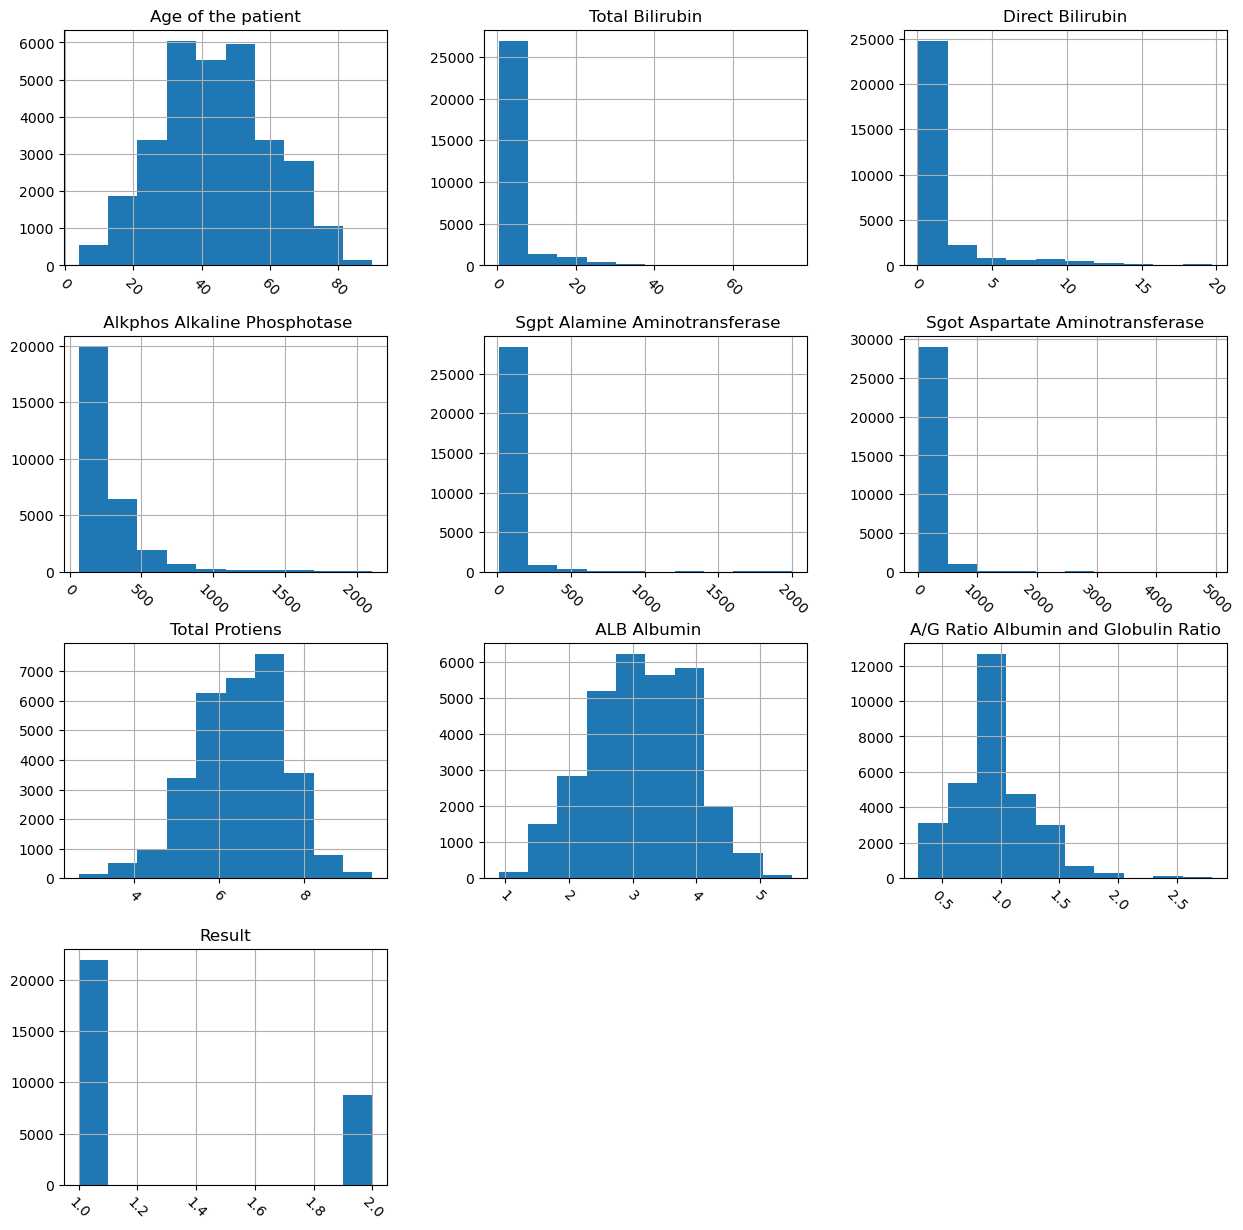

In [25]:
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

In [26]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [27]:
def partition(x):
    if x == 2:
        return 0
    return 1
df['Result'] = df['Result'].map(partition)

### Data Distribution

In [28]:
df.describe(include=['object'])

,Gender of the patient
count,29789
unique,2
top,Male
freq,21986


### Bar Chart Using Features

In [29]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='count', ylabel='Gender of the patient'>

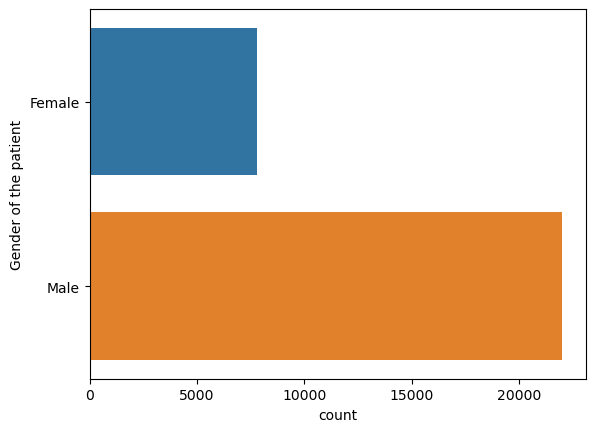

In [30]:
sns.countplot(y='Gender of the patient', data=df)

In [31]:
df[df['Gender of the patient'] ==1][['Result','Gender of the patient']].head()

,Result,Gender of the patient


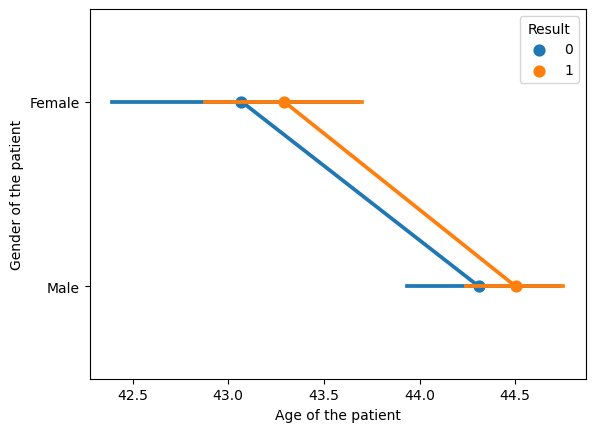

In [32]:
sns.pointplot (x="Age of the patient", y="Gender of the patient", hue="Result", data=df);

Number id patients that are male:  21986
Number of patients that are female:  7803


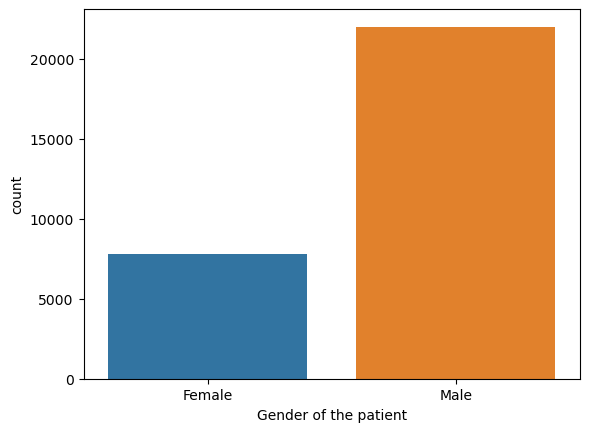

In [33]:
sns.countplot(data=df,x ='Gender of the patient', label='Count')
M, F =df['Gender of the patient'].value_counts()
print('Number id patients that are male: ',M)
print('Number of patients that are female: ',F)

In [34]:
#partitioning
def partition(x):
    if x=='Male':
        return 0
    return 1
df['Gender of the patient'] = df['Gender of the patient'].map(partition)

### 2-D Scatter Plot

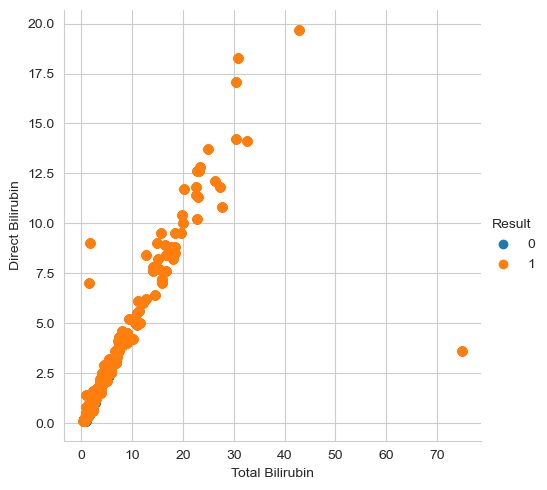

In [35]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Result' , height = 5).map(plt.scatter, 'Total Bilirubin', 'Direct Bilirubin').add_legend()

In [36]:
df.columns = df.columns.str.strip()

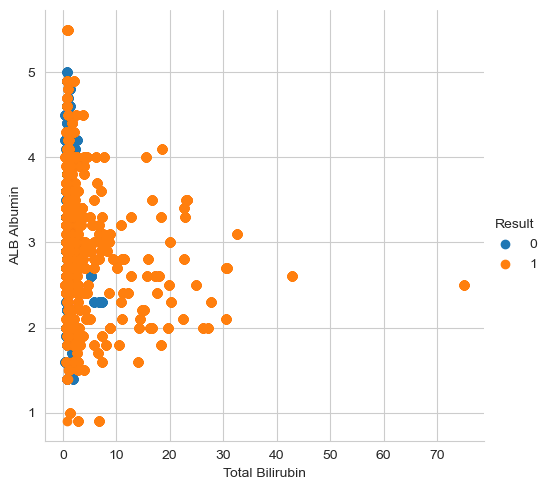

In [37]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Result', height = 5).map(plt.scatter, 'Total Bilirubin', 'ALB Albumin').add_legend()

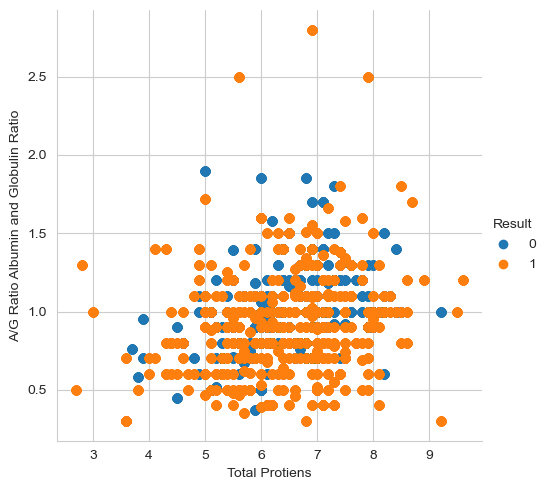

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Result', height = 5).map(plt.scatter, 'Total Protiens', 'A/G Ratio Albumin and Globulin Ratio').add_legend()

### Correlations

In [39]:
df.corr()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
Age of the patient,1.000000,-0.033836,-0.001600,-0.001521,-0.000761,0.000659,0.006104,-0.007951,-0.015164,-0.018056,0.004759
Gender of the patient,-0.033836,1.000000,-0.013470,-0.010978,-0.009340,-0.002105,0.003812,-0.005610,-0.001115,0.002300,-0.006623
Total Bilirubin,-0.001600,-0.013470,1.000000,0.886987,0.197183,0.207893,0.240273,0.001185,-0.222522,-0.197978,0.225061
Direct Bilirubin,-0.001521,-0.010978,0.886987,1.000000,0.220954,0.222759,0.256200,0.006474,-0.229106,-0.189414,0.249538
Alkphos Alkaline Phosphotase,-0.000761,-0.009340,0.197183,0.220954,1.000000,0.124099,0.160690,-0.022321,-0.161060,-0.228583,0.183356
Sgpt Alamine Aminotransferase,0.000659,-0.002105,0.207893,0.222759,0.124099,1.000000,0.783411,-0.041400,-0.026346,-0.002433,0.165914
Sgot Aspartate Aminotransferase,0.006104,0.003812,0.240273,0.256200,0.160690,0.783411,1.000000,-0.024501,-0.083383,-0.066912,0.158660
Total Protiens,-0.007951,-0.005610,0.001185,0.006474,-0.022321,-0.041400,-0.024501,1.000000,0.775607,0.226314,-0.030370
ALB Albumin,-0.015164,-0.001115,-0.222522,-0.229106,-0.161060,-0.026346,-0.083383,0.775607,1.000000,0.682759,-0.160346
A/G Ratio Albumin and Globulin Ratio,-0.018056,0.002300,-0.197978,-0.189414,-0.228583,-0.002433,-0.066912,0.226314,0.682759,1.000000,-0.158350


<Axes: >

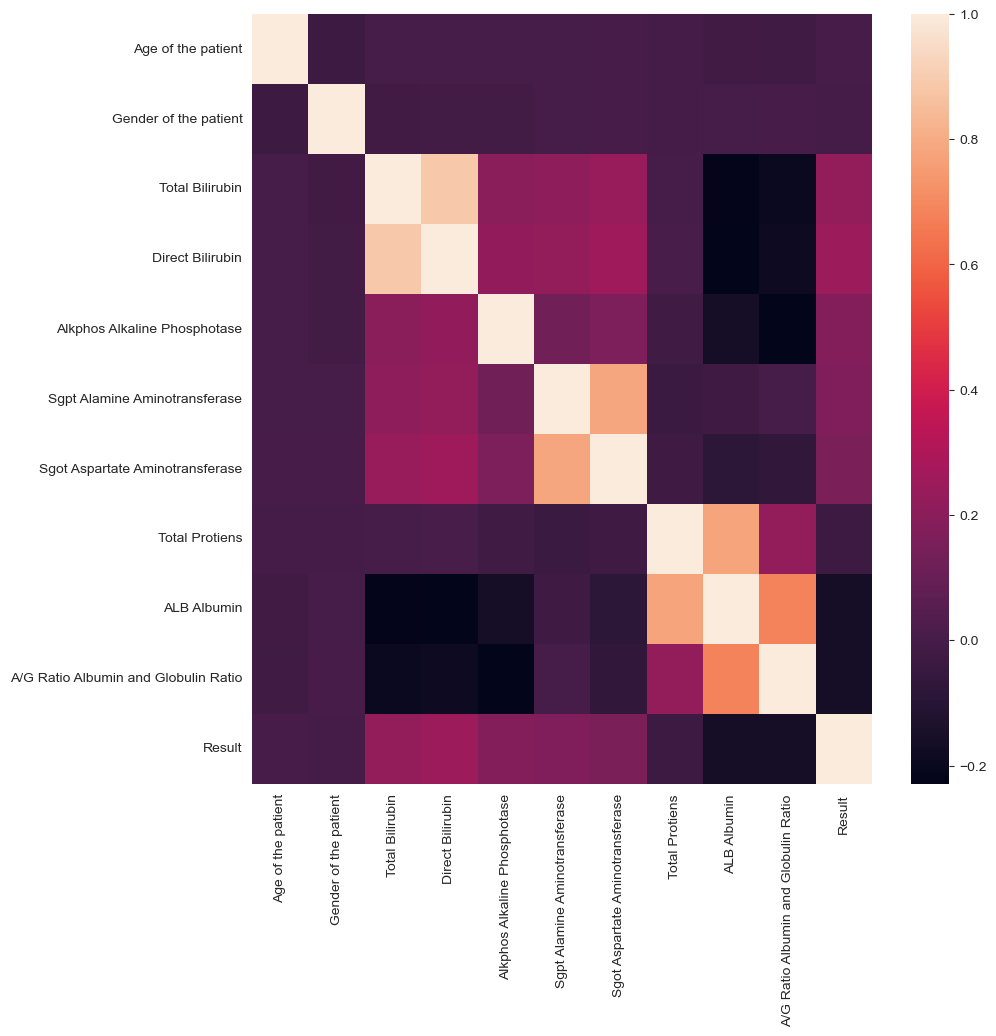

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

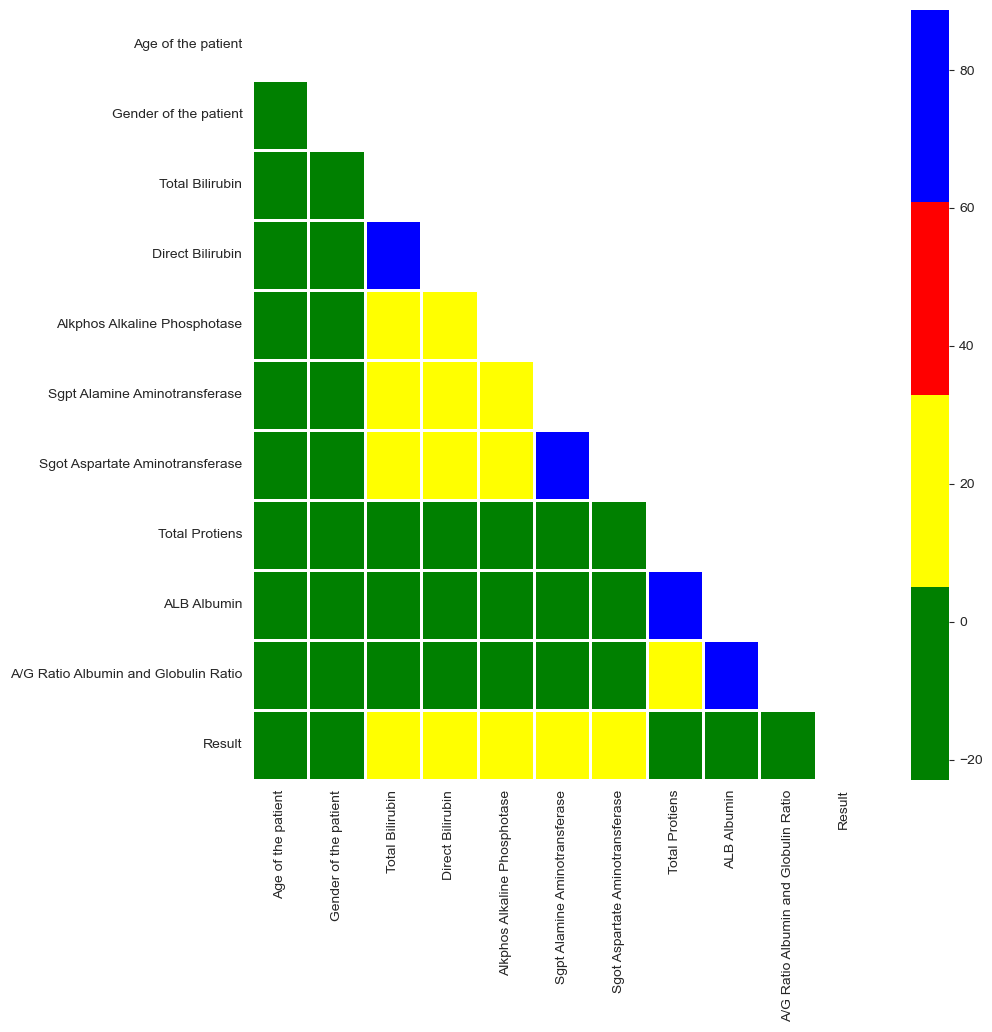

In [41]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

### Cleaning the Data

In [42]:
df=df.drop_duplicates()
print( df.shape)

(19231, 11)


<Axes: >

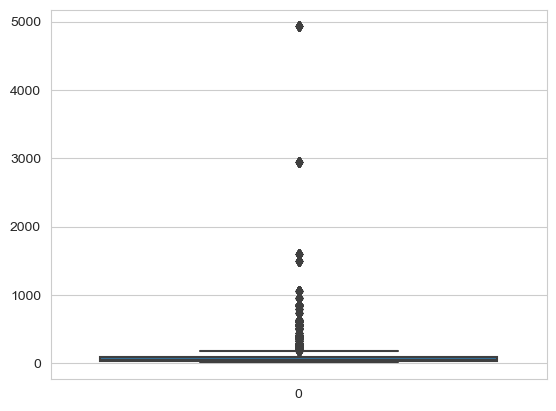

In [43]:
sns.boxplot(df['Sgot Aspartate Aminotransferase'])


In [44]:
df['Sgot Aspartate Aminotransferase'].sort_values(ascending=False).head()

21155    4929.0
12156    4929.0
25812    4929.0
135      4929.0
22904    4929.0
Name: Sgot Aspartate Aminotransferase, dtype: float64

In [45]:
df = df[df['Sgot Aspartate Aminotransferase'] <=3000 ]
df.shape

(18811, 11)

In [46]:
df.isnull().values.any()

True

In [47]:
df=df.dropna(how='any')

In [48]:
df.shape

(16673, 11)

In [49]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


# Machine Learning Models

### Data Preparation

In [50]:
y = df.Result
X = df.drop('Result', axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1234,
                                                   stratify=df.Result)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13338, 10) (3335, 10) (13338,) (3335,)


### Data standardization

In [53]:
train_mean = X_train.mean()
train_std = X_train.std()

In [54]:
X_train = (X_train - train_mean) / train_std

In [55]:
X_train.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,1.333800e+04,1.333800e+04,1.333800e+04,1.333800e+04,1.333800e+04,1.333800e+04,1.333800e+04,1.333800e+04,1.333800e+04,1.333800e+04
mean,-1.781950e-16,2.836737e-17,2.929963e-17,1.171985e-17,1.113386e-16,2.343971e-17,1.438346e-17,2.354625e-16,2.866037e-16,-1.720688e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.409256e+00,-6.840597e-01,-4.703479e-01,-4.929276e-01,-9.553418e-01,-3.904886e-01,-4.486910e-01,-3.458867e+00,-2.812714e+00,-1.998954e+00
25%,-7.124948e-01,-6.840597e-01,-4.071704e-01,-4.583608e-01,-4.814433e-01,-3.169238e-01,-3.778707e-01,-6.257061e-01,-6.734308e-01,-7.634486e-01
50%,7.528712e-02,-6.840597e-01,-3.755816e-01,-4.237941e-01,-3.418124e-01,-2.490177e-01,-2.976076e-01,1.054321e-01,-4.422993e-02,-5.303325e-02
75%,6.812732e-01,1.461751e+00,-1.070769e-01,-7.812639e-02,3.899888e-02,-1.018879e-01,-8.042519e-02,6.537857e-01,8.366513e-01,4.720563e-01
max,2.802224e+00,1.461751e+00,1.131227e+01,6.282159e+00,7.706000e+00,1.087060e+01,1.341321e+01,2.847200e+00,2.975934e+00,5.722952e+00


In [56]:
X_test = (X_test- train_mean) / train_std

In [57]:
X_test.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000
mean,-0.002101,-0.025839,-0.022753,-0.003914,0.012291,-0.016637,-0.023044,0.005216,0.017803,0.007788
std,1.009342,0.989675,0.904278,0.998030,1.054827,0.937228,0.936555,0.988712,0.991441,0.983527
min,-2.409256,-0.684060,-0.470348,-0.492928,-0.955342,-0.390489,-0.448691,-3.458867,-2.812714,-1.998954
25%,-0.712495,-0.684060,-0.407170,-0.458361,-0.481443,-0.316924,-0.377871,-0.625706,-0.673431,-0.763449
50%,-0.045910,-0.684060,-0.375582,-0.423794,-0.337581,-0.249018,-0.297608,0.105432,-0.044230,-0.083921
75%,0.681273,1.461751,-0.122871,-0.078126,0.038999,-0.096229,-0.080425,0.653786,0.836651,0.472056
max,2.802224,1.461751,11.312268,6.282159,7.706000,10.870598,13.413213,2.847200,2.975934,5.722952


# Model-1 Logistic Regression

In [58]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [59]:
model.best_estimator_

LogisticRegression(C=10000)

In [60]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [61]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [62]:
y_pred_proba[:10]

array([0.65844117, 0.58080147, 0.76023151, 0.76605847, 0.6760202 ,
       0.4620242 , 0.45190108, 0.47840024, 0.63430359, 0.75726385])

In [63]:
i=28
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 1, precited class = 1, predicted probability = 0.5403383712461503


In [64]:
confusion_matrix(y_test, y_pred).T

array([[ 191,  153],
       [ 758, 2233]], dtype=int64)

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

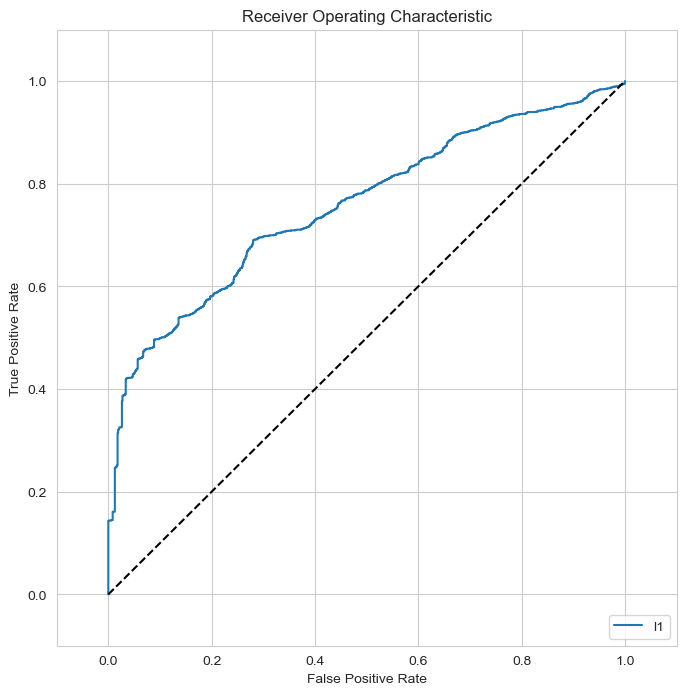

In [66]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
print(roc_auc_score(y_train, y_train_pred))

0.5692216633578143


In [68]:
print(auc(fpr, tpr))

0.7563036751969913


### Feature Importance

In [69]:
# Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [70]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Sgpt Alamine Aminotransferase
Direct Bilirubin
ALB Albumin
Total Protiens
Sgot Aspartate Aminotransferase
A/G Ratio Albumin and Globulin Ratio
Alkphos Alkaline Phosphotase
Total Bilirubin
Age of the patient
Gender of the patient


# Model-2 Random Forest

In [71]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [72]:
model.best_estimator_

RandomForestClassifier(min_samples_leaf=4, n_estimators=300)

In [73]:
y_train_pred = model.predict(X_train)

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [76]:
# Display first 10 predictions
y_pred_proba[:10]

array([1.        , 1.        , 1.        , 0.01633654, 0.99985507,
       1.        , 0.00321199, 0.        , 0.00317241, 1.        ])

In [77]:
confusion_matrix(y_test, y_pred).T

array([[ 948,    0],
       [   1, 2386]], dtype=int64)

In [78]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

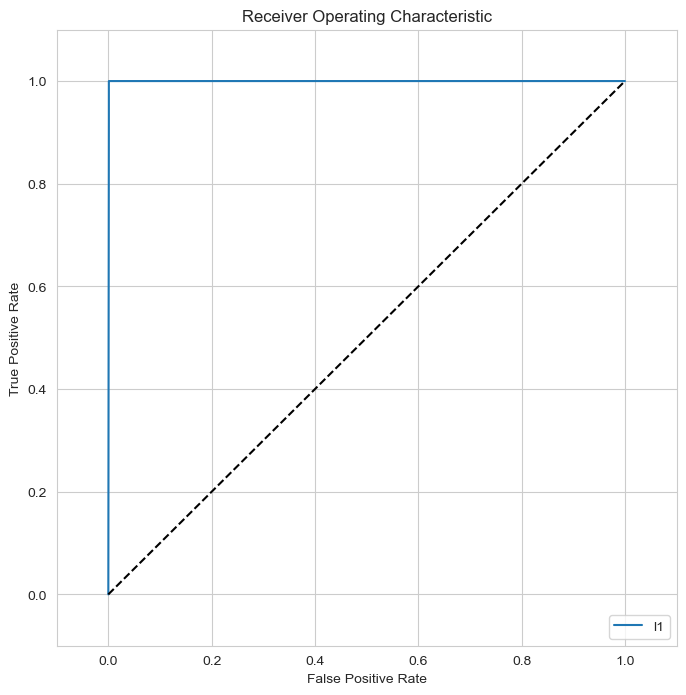

In [79]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.999736425935688

In [81]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9993481469442842


### Feature Importance

In [82]:
# Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [83]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkphos Alkaline Phosphotase
Sgpt Alamine Aminotransferase
Sgot Aspartate Aminotransferase
Total Bilirubin
ALB Albumin
Total Protiens
Direct Bilirubin
A/G Ratio Albumin and Globulin Ratio
Age of the patient
Gender of the patient


# Model-3 XGBoost

In [84]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='roc_auc')

In [85]:
model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
y_train_pred = model.predict(X_train)

In [87]:
y_pred = model.predict(X_test)

In [88]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [89]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.9848053 , 0.86199594, 0.99386287, 0.06907398, 0.9884544 ,
       0.9739986 , 0.05789009, 0.0468775 , 0.08286684, 0.99068135],
      dtype=float32)

In [90]:
# confusion matrix
confusion_matrix(y_test, y_pred).T

array([[ 948,    2],
       [   1, 2384]], dtype=int64)

In [91]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

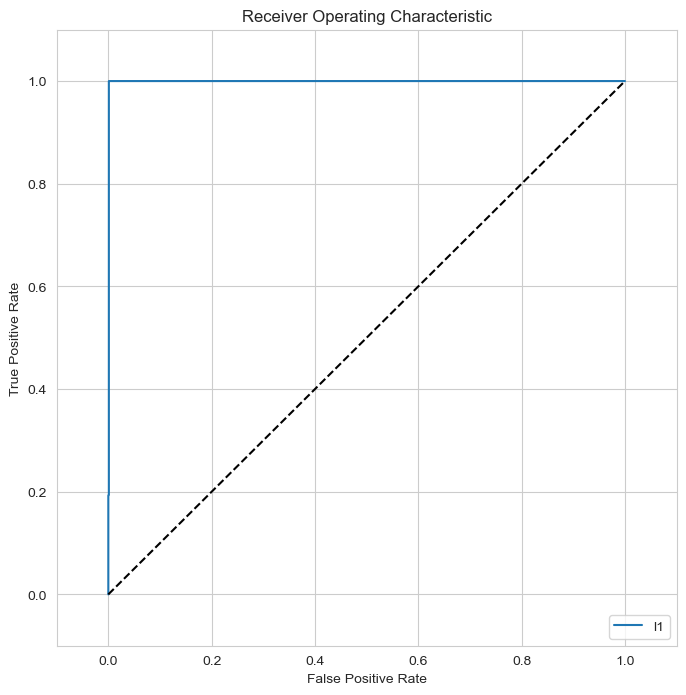

In [92]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.999736425935688

In [94]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9991498528914277


### Feature Importance

In [95]:
model = XGBClassifier(max_depth=1,learning_rate=0.05,n_estimators=500, reg_lambda=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
def my_plot_importance(booster, figsize, **kwargs):
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

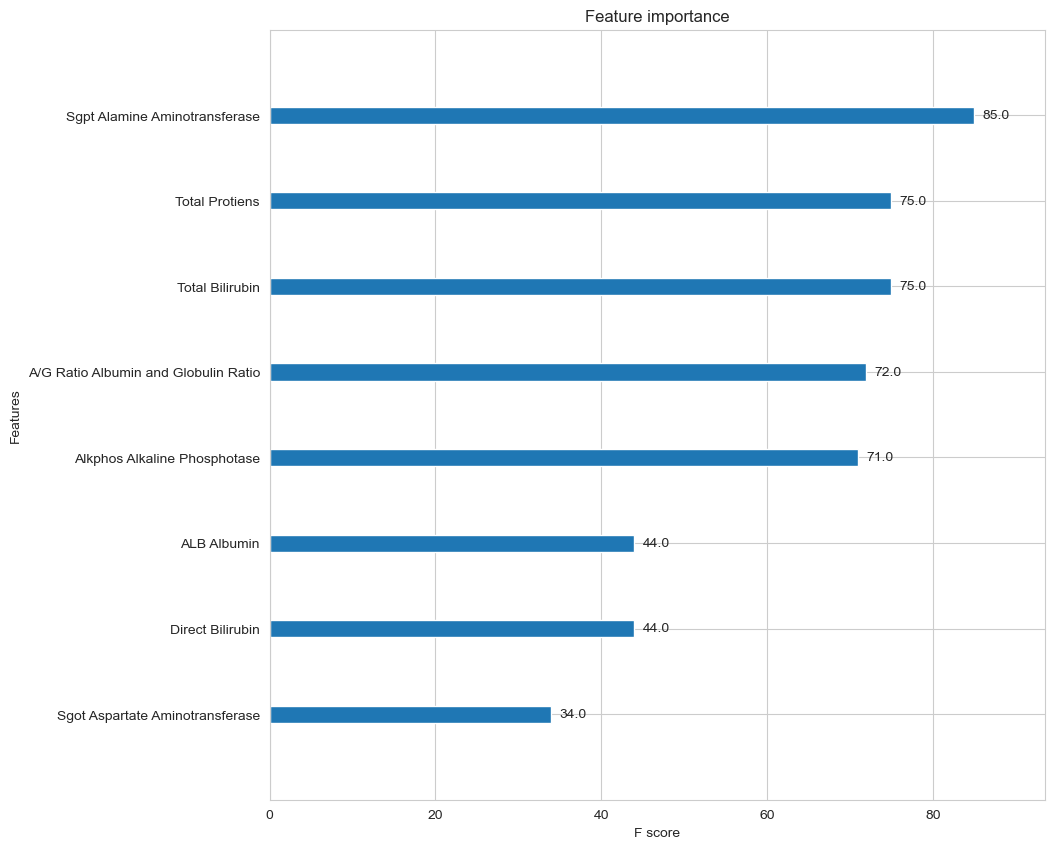

In [97]:
my_plot_importance(model, (10,10))

# Model-4 KNN

In [98]:
# creating odd list of K for KNN
neighbors = list(range(1,200,2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 1.


In [99]:
MSE.index(min(MSE))

0

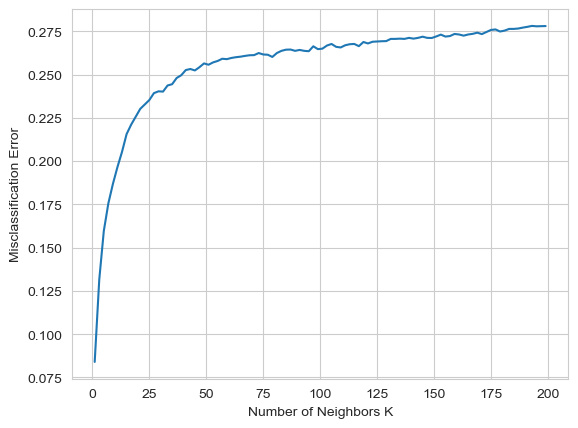

In [100]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [101]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [102]:
y_pred = classifier.predict(X_test)

In [103]:
y_train_pred = classifier.predict(X_train)

In [104]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

92.95352323838081

In [105]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[ 838,  124],
       [ 111, 2262]], dtype=int64)

In [106]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [107]:
# Display first 10 predictions
y_pred_proba[:10]

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 1.])

In [108]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

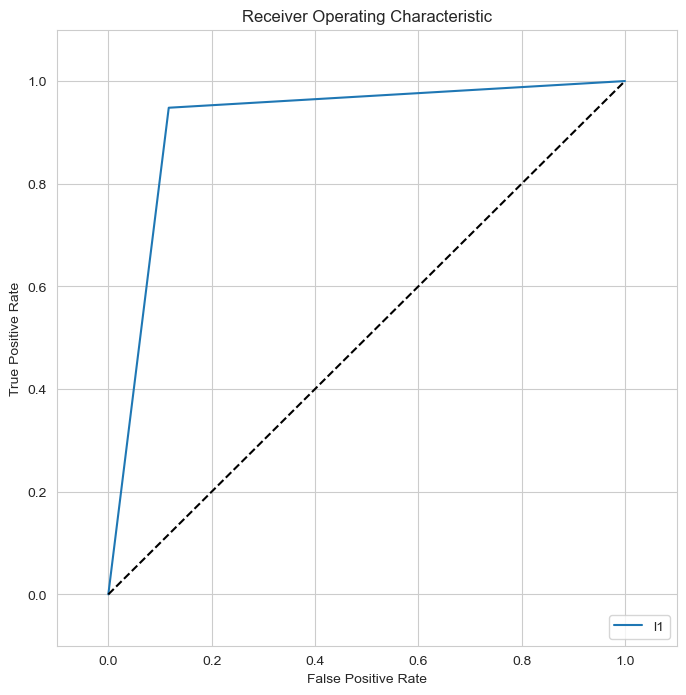

In [109]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9998682129678439

In [111]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9155324747362776


# Model-5 Decision Tree

In [112]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [113]:
model.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=4)

In [114]:
y_train_pred = model.predict(X_train)

In [115]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [116]:
y_pred_proba[:10]

array([1.        , 0.634273  , 1.        , 0.72397094, 0.7565    ,
       0.84507042, 0.84507042, 0.634273  , 0.48176101, 1.        ])

In [117]:
confusion_matrix(y_test, y_pred).T

array([[ 838,  124],
       [ 111, 2262]], dtype=int64)

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

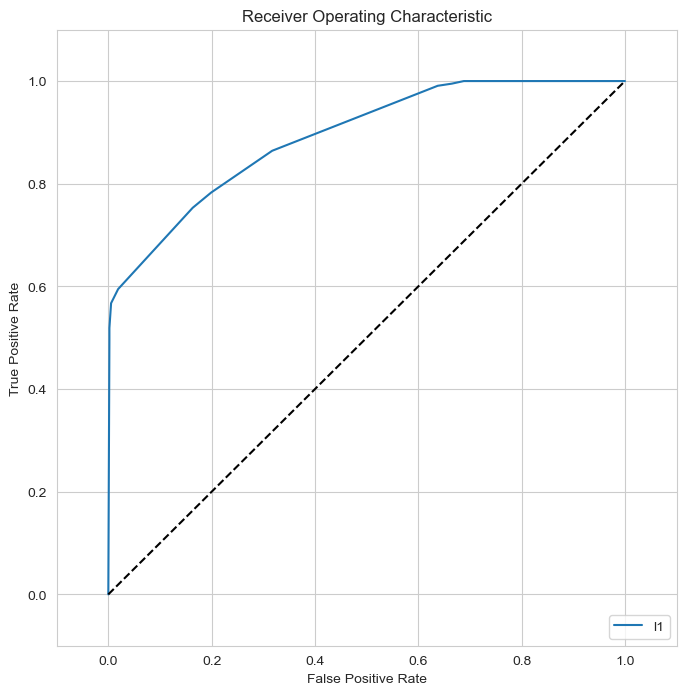

In [119]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7818741795069729

In [121]:
print(auc(fpr, tpr))

0.8915415441497956


### Feature Importance

In [122]:
# Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [123]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Total Bilirubin
Alkphos Alkaline Phosphotase
Sgpt Alamine Aminotransferase
Sgot Aspartate Aminotransferase
A/G Ratio Albumin and Globulin Ratio
Total Protiens
Direct Bilirubin
ALB Albumin
Age of the patient
Gender of the patient


# Model-6 SVC

In [124]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [125]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(probability=True)

In [126]:
svc_param_selection(X_train,y_train,5)

{'C': 10, 'gamma': 1}

In [127]:
# Building the model again with the best hyperparameters
model = SVC(C=1, gamma=1)
model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [128]:
# Predict Train results
y_train_pred = model.predict(X_train)

In [129]:
# Predict Test results
y_pred = model.predict(X_test)

In [130]:
#confusion matrix
confusion_matrix(y_test, y_pred).T

array([[ 477,  100],
       [ 472, 2286]], dtype=int64)

In [131]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

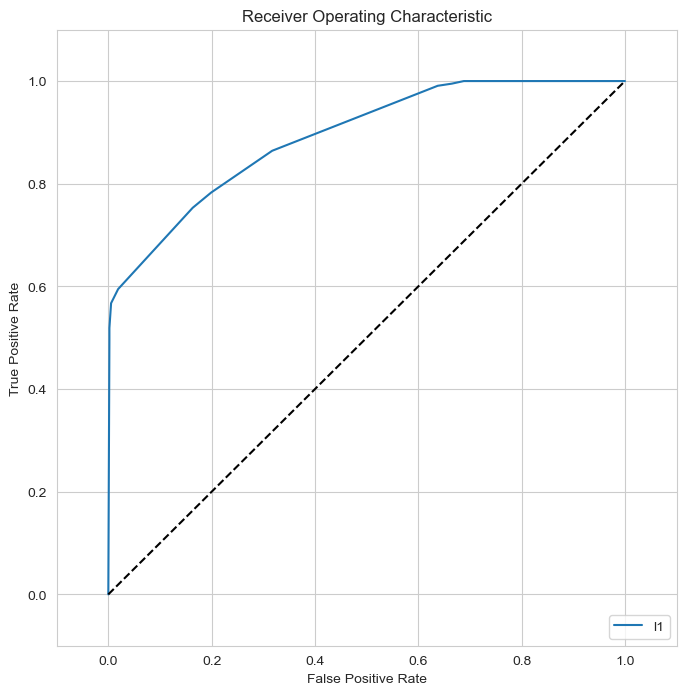

In [132]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7523479190904949

In [134]:
print(auc(fpr, tpr))

0.8915415441497956


# Model -7 Gradient Boosting

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [136]:
# Import Library
from sklearn.ensemble import GradientBoostingClassifier

# Creating Gradient Boosting Classifier object
gbclass = GradientBoostingClassifier(
                    random_state = 1000,
                    verbose = 0,
                    n_estimators = 10,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 3
                   )
# Training the model using the training sets and check score
gbclass.fit(X_train, y_train)

# Predicting Output
predicted= gbclass.predict(X_test)

# gbclass = GradientBoostingClassifier
gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
print('Score: \n', gbclass_score)
print('Test Score: \n', gbclass_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 85.92
Test Score: 
 84.86
Accuracy: 
 0.848575712143928
[[ 589  145]
 [ 360 2241]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       949
           1       0.86      0.94      0.90      2386

    accuracy                           0.85      3335
   macro avg       0.83      0.78      0.80      3335
weighted avg       0.84      0.85      0.84      3335



In [137]:
# Predict Train results
y_train_pred = gbclass.predict(X_train)

In [138]:
# Predict Test results
y_pred = gbclass.predict(X_test)

In [139]:
y_pred_proba = gbclass.predict_proba(X_test)[:,1]

In [140]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

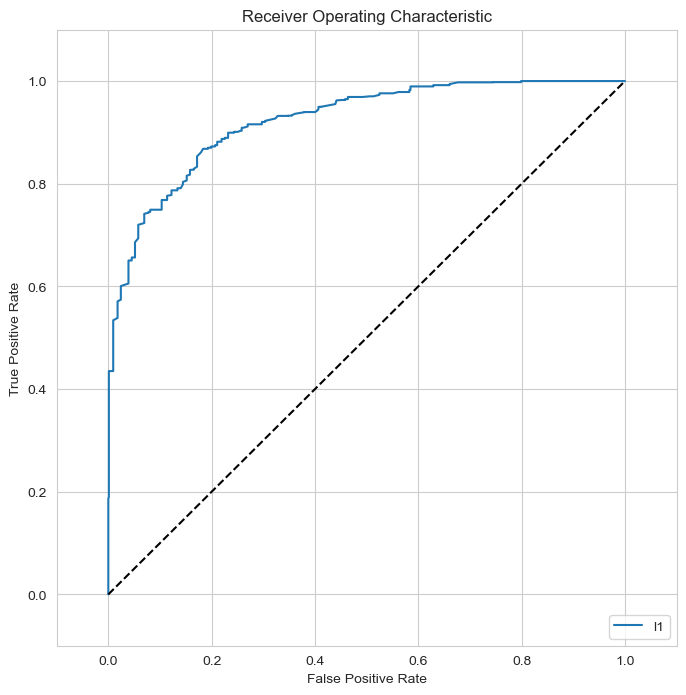

In [141]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
roc_auc_score(y_train,y_train_pred )

0.7941085562813479

In [143]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9223102449571924


# Neural Networks

In [144]:
# Neural Networks# Neural
neural = MLPClassifier(hidden_layer_sizes=40,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=137,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)

#Predicting Output
predicted = neural.predict(X_test)

neural_score = round(neural.score(X_train, y_train) * 100, 2)
neural_score_test = round(neural.score(X_test, y_test) * 100, 2)
print('Neural Score: \n', neural_score)
print('Neural Test Score: \n', neural_score_test)
print('Accuracy: \n', accuracy_score(y_test, predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Neural Score: 
 79.7
Neural Test Score: 
 78.53
Accuracy: 
 0.7853073463268366
[[ 482  249]
 [ 467 2137]]
              precision    recall  f1-score   support

           0       0.66      0.51      0.57       949
           1       0.82      0.90      0.86      2386

    accuracy                           0.79      3335
   macro avg       0.74      0.70      0.72      3335
weighted avg       0.77      0.79      0.78      3335



In [145]:
# Predict Train results
y_train_pred = neural.predict(X_train)

In [146]:
# Predict Test results
y_pred = neural.predict(X_test)

In [147]:
y_pred_proba = neural.predict_proba(X_test)[:,1]

In [148]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

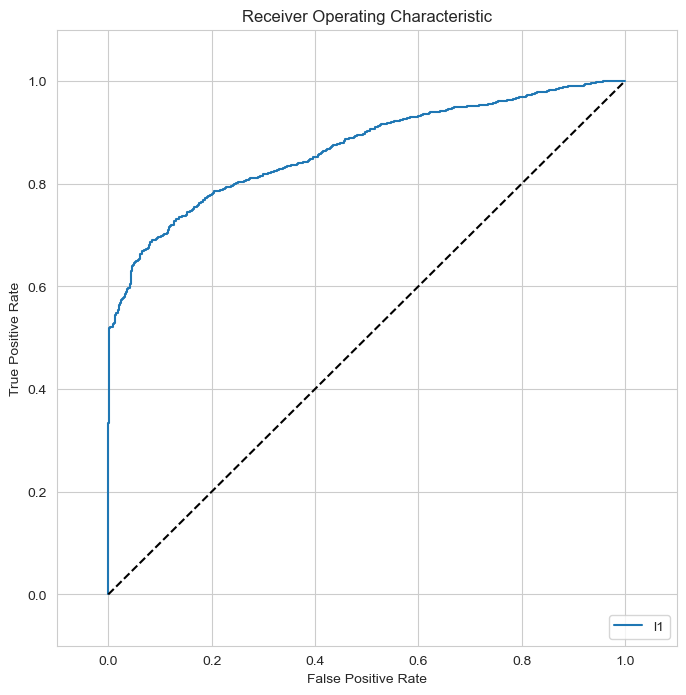

In [149]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [150]:
roc_auc_score(y_train,y_train_pred )

0.7115618762761691

In [151]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.8667618537005026


In [152]:
print(df.columns)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')


# K Fold Validation for Logistic Regression

In [153]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [154]:
# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

In [155]:
# 'X' contains features and 'y' contains the target variable
X = df.drop(columns=['Result'])
y = df['Result']

In [156]:
# Columns to be one-hot encoded and columns to be imputed
categorical_cols = ['Gender of the patient']
numeric_cols = X.select_dtypes(include='number').columns.tolist()

In [157]:
# Preprocessing steps for different column types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

In [158]:
# Combining the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [159]:
# Initializing logistic regression classifier
clf = LogisticRegression()

In [160]:
# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [161]:
# Initializing a list to store the accuracy scores for each fold
accuracy_scores = []

In [162]:
# Performing k-fold cross-validation
for train_idx, test_idx in kfold.split(X):
    # Splitting data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Training the classifier on the preprocessed training data
    clf.fit(X_train_preprocessed, y_train)

    # Predicting the target variable on the preprocessed testing data
    y_pred = clf.predict(X_test_preprocessed)

    # Calculating the accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Appending the accuracy score to the list
    accuracy_scores.append(accuracy)

In [163]:
# Calculating the mean accuracy score across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7161382464063892


# K Fold validation for Random Forest

In [164]:
# Importing libraries
from sklearn.ensemble import RandomForestClassifier

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# Separating features and target variable
X = df.drop(columns=['Result'])
y = df['Result']

# Identifying numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Defining the number of folds for k-fold cross-validation
k = 5

# Initializing k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing a list to store the accuracy scores
accuracy_scores = []

# Iteration through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split data into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initializing the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Training the classifier
    rf_classifier.fit(X_train, y_train)

    # Predicting the target variable on the testing set
    y_pred = rf_classifier.predict(X_test)

    # Calculating the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculating the mean accuracy score across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.996415855532345


# K Fold Validation for XGBoost

In [165]:
# Importing libraries
from xgboost import XGBClassifier

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# Separating features and target variable
X = df.drop(columns=['Result'])  # Replace 'target_column' with the name of your target column
y = df['Result']  # Replace 'target_column' with the name of your target column

# Ensuring target variable contains only binary values (0 or 1)
y = y.apply(lambda x: 1 if x == 1 else 0)

# Identifying numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Defining the number of folds for k-fold cross-validation
k = 5

# Initializing k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing a list to store the accuracy scores
accuracy_scores = []

# Iterating through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split data into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initializing the XGBoost classifier
    xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

    # Training the classifier
    xgb_classifier.fit(X_train, y_train)

    # Predicting the target variable on the testing set
    y_pred = xgb_classifier.predict(X_test)

    # Calculating the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculating the mean accuracy score across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9978820940383452


# K Fold validation for KNN Model

In [166]:
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# Separating features and target variable
X = df.drop(columns=['Result'])  # Replace 'target_column' with the name of your target column
y = df['Result']  # Replace 'target_column' with the name of your target column

# Identifying numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Defining the number of folds for k-fold cross-validation
k = 5

# Initializing k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing a list to store the accuracy scores
accuracy_scores = []

# Iterating through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split data into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initializing the KNN classifier
    knn_classifier = KNeighborsClassifier()

    # Training the classifier
    knn_classifier.fit(X_train, y_train)

    # Predicting the target variable on the testing set
    y_pred = knn_classifier.predict(X_test)

    # Calculating the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculating the mean accuracy score across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9647779307984553


# K Fold Validation for Decesion Tree

In [167]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# Separating features and target variable
X = df.drop(columns=['Result'])  # Replace 'target_column' with the name of your target column
y = df['Result']  # Replace 'target_column' with the name of your target column

# Identifying numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Defining the number of folds for k-fold cross-validation
k = 5

# Initializing k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing a list to store the accuracy scores
accuracy_scores = []

# Iterating through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split data into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initializing the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Training the classifier
    dt_classifier.fit(X_train, y_train)

    # Predicting the target variable on the testing set
    y_pred = dt_classifier.predict(X_test)

    # Calculating the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculating the mean accuracy score across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9898341458609234


# K Fold validation for SVC Model

In [168]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

# Loading dataset
df = pd.read_csv('Liver_Patient_Dataset.csv', encoding='unicode_escape')

# Separating features and target variable
X = df.drop(columns=['Result'])  # Replace 'Result' with the name of your target column
y = df['Result']

# Identifying numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Defining the number of folds for k-fold cross-validation
k = 5

# Initializing k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing a list to store the accuracy scores
accuracy_scores = []

# Iterating through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split data into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initializing the SVC classifier using a pipeline
    svc_classifier = make_pipeline(StandardScaler(), SVC(random_state=42))

    # Training the classifier
    svc_classifier.fit(X_train, y_train)

    # Predicting the target variable on the testing set
    y_pred = svc_classifier.predict(X_test)

    # Calculating the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculating the mean accuracy score across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7264342769289988


# K Fold validation for Gradient Boosting

In [169]:
# Importing libraries
from sklearn.ensemble import GradientBoostingClassifier

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# Separating features and target variable
X = df.drop(columns=['Result'])  # Replace 'target_column' with the name of your target column
y = df['Result']  # Replace 'target_column' with the name of your target column

# Identifying numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Defining the number of folds for k-fold cross-validation
k = 5

# Initializing k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing a list to store the accuracy scores
accuracy_scores = []

# Iterating through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Split data into training and testing sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initializing the Gradient Boosting classifier
    gb_classifier = GradientBoostingClassifier(random_state=42)

    # Training the classifier
    gb_classifier.fit(X_train, y_train)

    # Predicting the target variable on the testing set
    y_pred = gb_classifier.predict(X_test)

    # Calculating the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculating the mean accuracy score across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.8852757909770453


# K Fold Validation for Neural Network Model

In [170]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# Separating features and target variable
X = df.drop(columns=['Result']).values  # Features
y = df['Result'].values.reshape(-1, 1)  # Target variable

# Identifying numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X_numeric = numeric_imputer.fit_transform(df[numeric_cols])

# Imputing missing values for categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_categorical = categorical_imputer.fit_transform(df[categorical_cols])

# One-hot encode categorical variables
encoder = OneHotEncoder()
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Concatenating numeric and encoded categorical features
X = np.concatenate((X_numeric, X_categorical_encoded.toarray()), axis=1)

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Defining the number of folds for k-fold cross-validation
k = 5

# Initializing k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing a list to store the accuracy scores
accuracy_scores = []

# Iterating through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]  # Split features into training and testing sets
    y_train, y_test = y[train_index], y[test_index]  # Split target variable into training and testing sets

    # Defining the neural network model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluating the model on the testing set
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Appending accuracy to the list
    accuracy_scores.append(accuracy)

# Calculating the mean accuracy score across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7141178965568542


# K-Fold ROC Curve for Logistic Regression

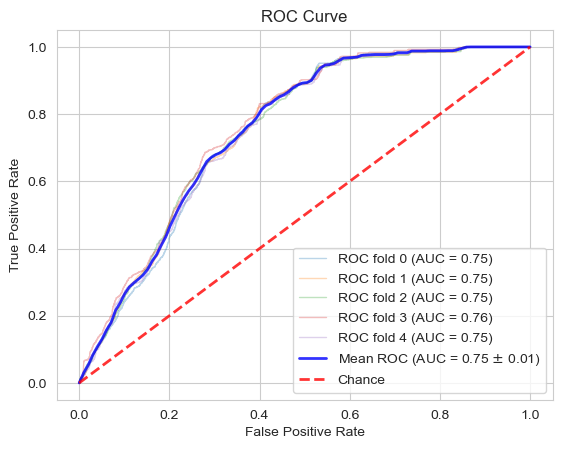

In [171]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# 'X' contains features and 'y' contains the target variable
X = df.drop(columns=['Result'])
y = df['Result']

# Encoding target variable to binary format
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Columns to be one-hot encoded and columns to be imputed
categorical_cols = ['Gender of the patient']
numeric_cols = X.select_dtypes(include='number').columns.tolist()

# Preprocessing steps for different column types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initializing Random Forest classifier
clf =LogisticRegression()

# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing lists to store ROC curve data
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

# Performing k-fold cross-validation
for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    # Splitting data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_binary[train_idx], y_binary[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Training the classifier on the preprocessed training data
    clf.fit(X_train_preprocessed, y_train)

    # Predicting the target variable on the preprocessed testing data
    y_probs_test = clf.predict_proba(X_test_preprocessed)[:, 1]

    # Calculating ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_probs_test)

    # Interpolating ROC curve to obtain points at fixed intervals
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    # Calculating AUC for this fold
    roc_auc = roc_auc_score(y_test, y_probs_test)
    aucs.append(roc_auc)

    # Plotting ROC curve for this fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

# Calculating mean and standard deviation of ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Plotting mean ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

# Plotting chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Setting labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Heatmap

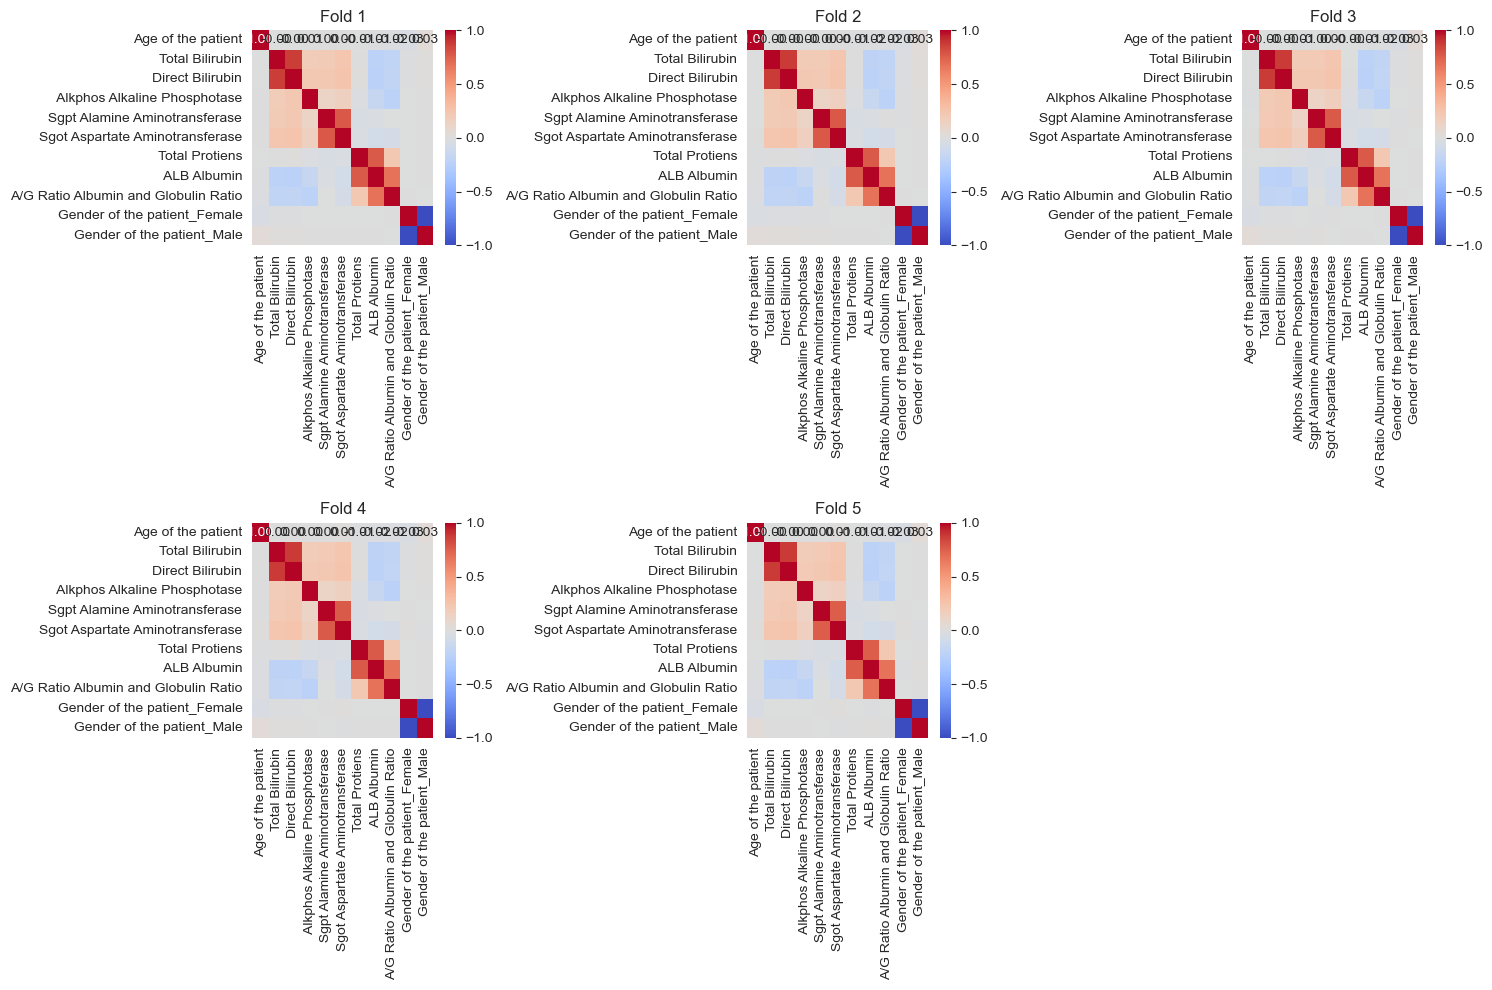

In [172]:
# Initializing Logistic Regression classifier
clf = LogisticRegression()

# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing DataFrame to store correlation matrices for each fold
corr_matrices = []

# Performing k-fold cross-validation
for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    # Splitting data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Converting preprocessed data back to DataFrame
    X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=numeric_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))

    # Calculating correlation matrix for this fold
    corr_matrix = X_train_preprocessed_df.corr()
    corr_matrices.append(corr_matrix)

# Plotting the heatmap for each fold
plt.figure(figsize=(15, 10))
for i, corr_matrix in enumerate(corr_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Fold {}'.format(i+1))
plt.tight_layout()
plt.show()

# K-fold ROC Curve for Random Forest

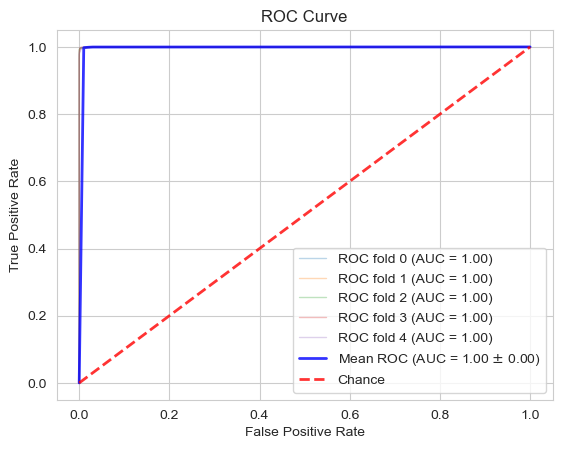

In [173]:
# Importing libraries
from sklearn.ensemble import RandomForestClassifier

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# 'X' contains features and 'y' contains the target variable
X = df.drop(columns=['Result'])
y = df['Result']

# Encoding target variable to binary format
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Columns to be one-hot encoded and columns to be imputed
categorical_cols = ['Gender of the patient']
numeric_cols = X.select_dtypes(include='number').columns.tolist()

# Preprocessing steps for different column types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initializing Random Forest classifier
clf =RandomForestClassifier()

# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store ROC curve data
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

# Performing k-fold cross-validation
for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    # Splitting data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_binary[train_idx], y_binary[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Training the classifier on the preprocessed training data
    clf.fit(X_train_preprocessed, y_train)

    # Predicting the target variable on the preprocessed testing data
    y_probs_test = clf.predict_proba(X_test_preprocessed)[:, 1]

    # Calculating ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_probs_test)

    # Interpolating ROC curve to obtain points at fixed intervals
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    # Calculating AUC for this fold
    roc_auc = roc_auc_score(y_test, y_probs_test)
    aucs.append(roc_auc)

    # Plotting ROC curve for this fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

# Calculating mean and standard deviation of ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Plotting mean ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

# Plotting chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Setting labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Heatmap

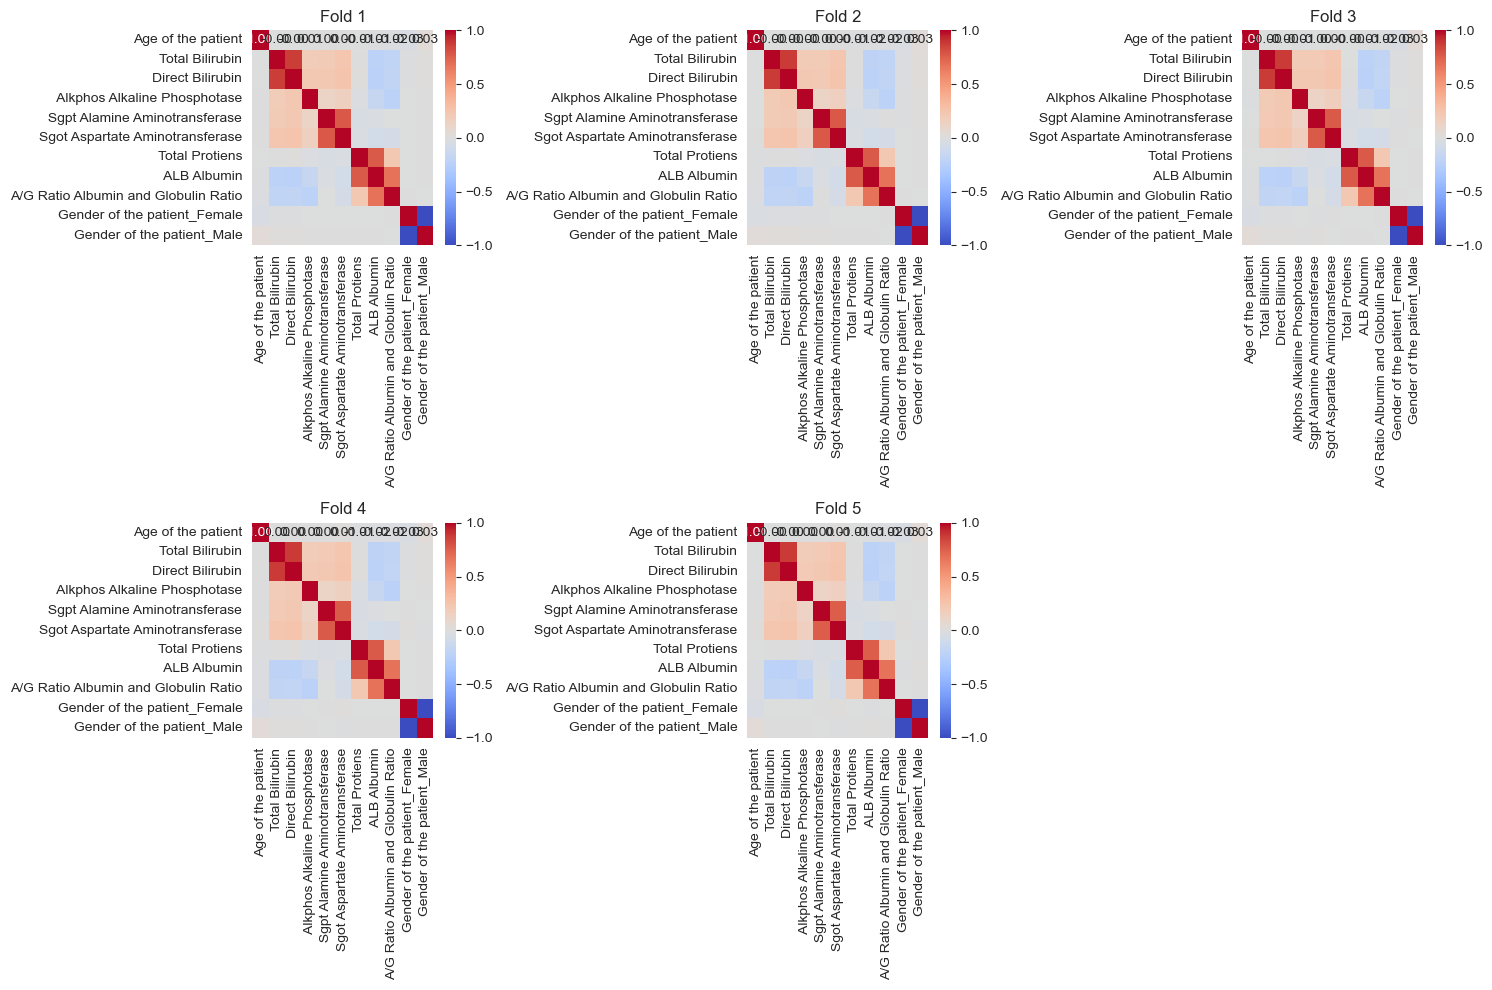

In [174]:
# Initializing Random Forest classifier
clf = RandomForestClassifier()

# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize DataFrame to store correlation matrices for each fold
corr_matrices = []

# Performing k-fold cross-validation
for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    # Splitting data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Training the classifier on the preprocessed training data
    clf.fit(X_train_preprocessed, y_train)

    # Converting preprocessed data back to DataFrame
    X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=numeric_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))

    # Calculating correlation matrix for this fold
    corr_matrix = X_train_preprocessed_df.corr()
    corr_matrices.append(corr_matrix)

# Plotting the heatmap for each fold
plt.figure(figsize=(15, 10))
for i, corr_matrix in enumerate(corr_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Fold {}'.format(i+1))
plt.tight_layout()
plt.show()

# K-fold ROC Curve for XGBoost

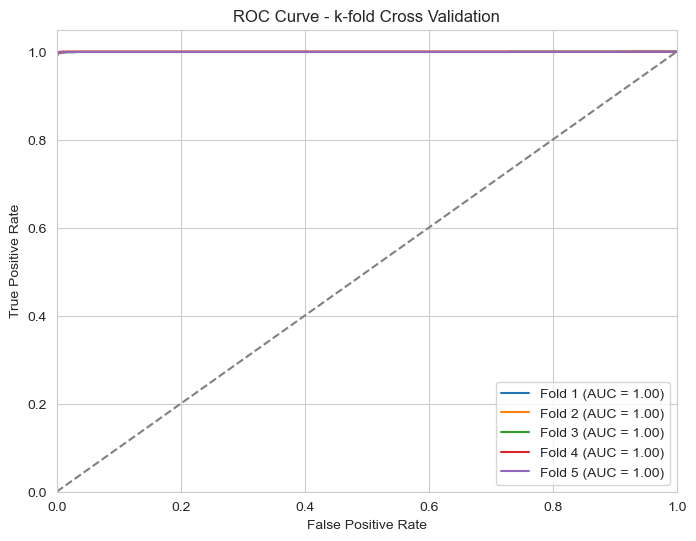

In [175]:
# Importing libraries
import xgboost as xgb

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# 'X' contains features and 'y' contains the target variable
X = df.drop(columns=['Result'])
y = df['Result']

# Converting target variable to binary format
y_binary = np.where(y == 2, 1, 0)

# Columns to be one-hot encoded and columns to be imputed
categorical_cols = ['Gender of the patient']
numeric_cols = X.select_dtypes(include='number').columns.tolist()

# Preprocessing steps for different column types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initializing XGBoost classifier
clf = xgb.XGBClassifier()

# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing lists to store fpr, tpr, and auc for each fold
all_fpr = []
all_tpr = []
all_auc = []

# Performing k-fold cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_binary[train_idx], y_binary[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Training the classifier on the preprocessed training data
    clf.fit(X_train_preprocessed, y_train)

    # Predicting probabilities on the preprocessed testing data
    y_probs_test = clf.predict_proba(X_test_preprocessed)[:, 1]

    # Calculating ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_probs_test)
    auc = roc_auc_score(y_test, y_probs_test)

    # Appending fpr, tpr, and auc to lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(auc)

# Plotting ROC curves for each fold
plt.figure(figsize=(8, 6))
for i in range(len(all_fpr)):
    plt.plot(all_fpr[i], all_tpr[i], label='Fold {} (AUC = {:.2f})'.format(i+1, all_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - k-fold Cross Validation')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Heatmap

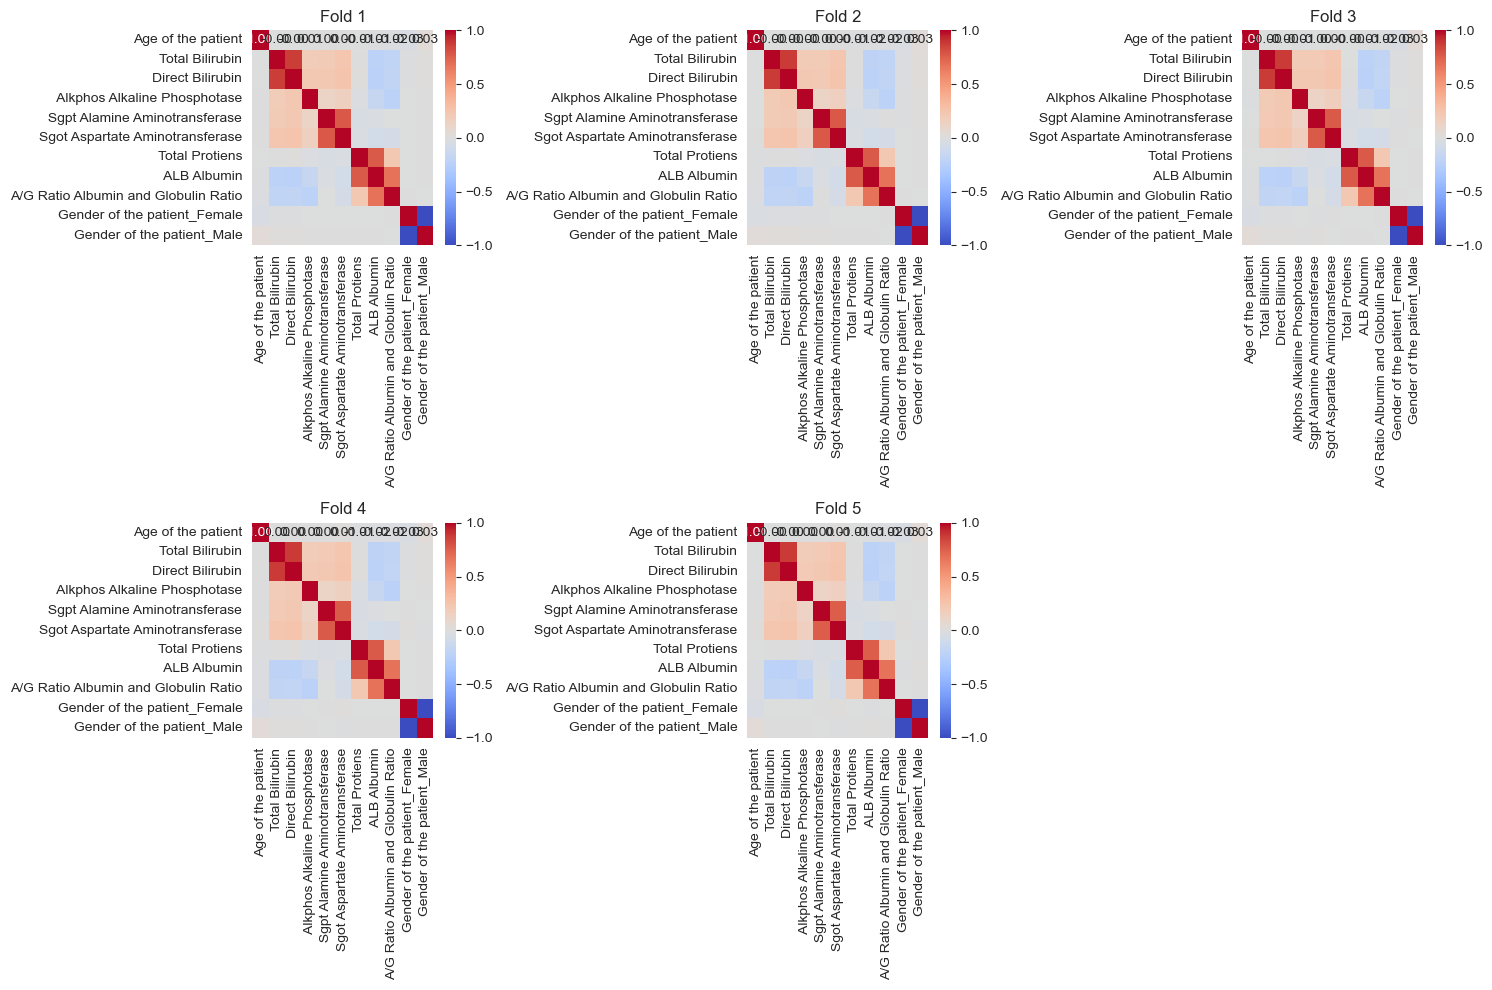

In [176]:
# Initializing XGBoost classifier
clf = xgb.XGBClassifier()

# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing list to store correlation matrices for each fold
corr_matrices = []

# Performing k-fold cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)

    # Converting preprocessed data back to DataFrame
    X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=numeric_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))

    # Calculating correlation matrix for this fold
    corr_matrix = X_train_preprocessed_df.corr()
    corr_matrices.append(corr_matrix)

# Plotting heatmaps for each fold
plt.figure(figsize=(15, 10))
for i, corr_matrix in enumerate(corr_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Fold {}'.format(i+1))
plt.tight_layout()
plt.show()

# K-fold ROC Curve for KNN

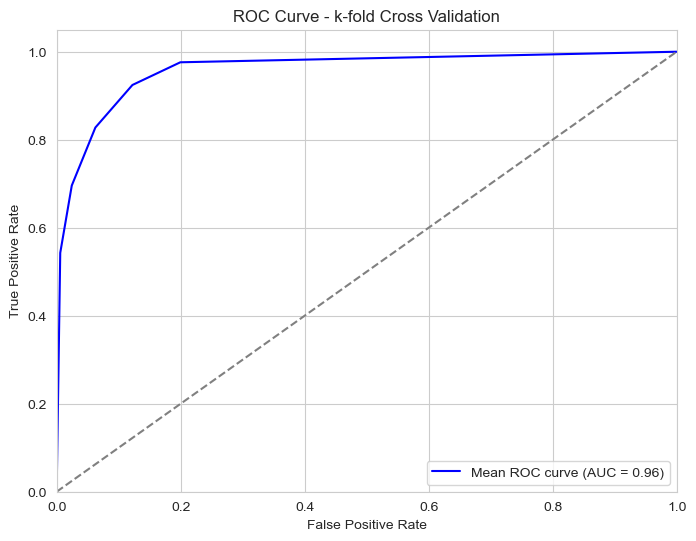

In [177]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# Map target variable to binary format (0 and 1)
df['Result'] = df['Result'].map({1: 0, 2: 1})

# Separating features and target variable
X = df.drop(columns=['Result'])
y = df['Result']

# Defining categorical and numerical columns
categorical_cols = ['Gender of the patient']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Defining the number of neighbors for KNN
n_neighbors = 5

# Defining the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initializing lists to store fpr, tpr, and auc for each fold
all_fpr = []
all_tpr = []
all_auc = []

# Performing k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Preprocess the data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Initializing KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Training the model
    knn.fit(X_train_processed, y_train)

    # Predicting probabilities on the test data
    y_probs = knn.predict_proba(X_test_processed)[:, 1]

    # Calculating ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)

    # Appending fpr, tpr, and auc to lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(auc)

# Calculating mean FPR and TPR across all folds
mean_fpr = np.mean(all_fpr, axis=0)
mean_tpr = np.mean(all_tpr, axis=0)

# Calculating mean AUC across all folds
mean_auc = np.mean(all_auc)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='blue', label='Mean ROC curve (AUC = %0.2f)' % mean_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - k-fold Cross Validation')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Heatmap

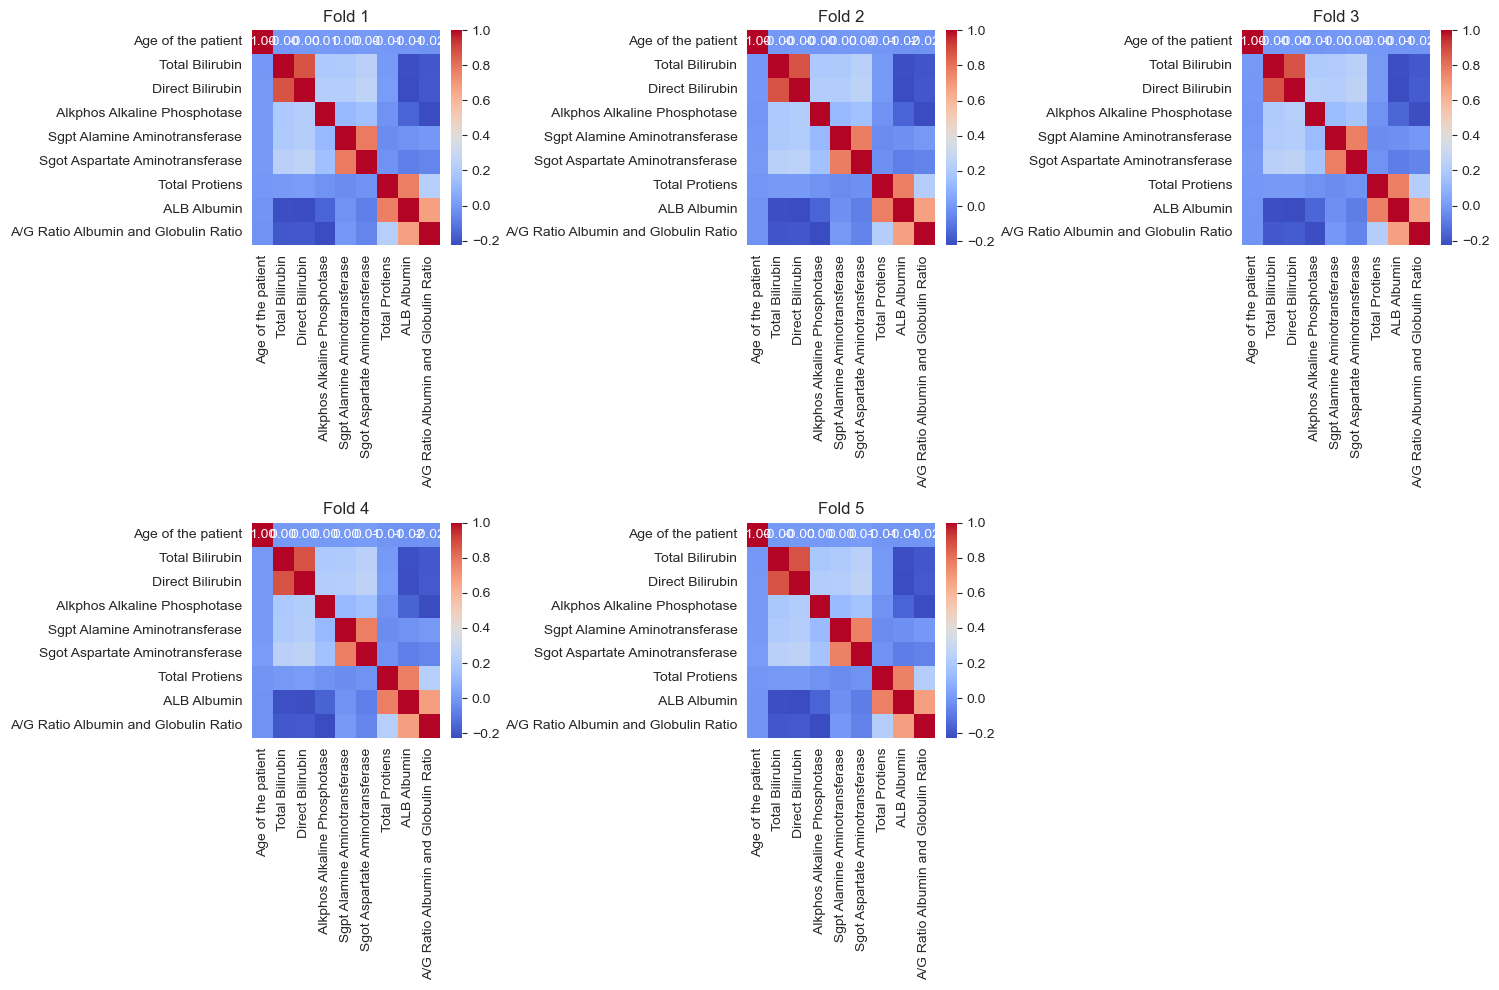

In [178]:
# Initializing lists to store correlation matrices for each fold
corr_matrices = []

# Performing k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]

    # Imputing missing values and scale numeric features
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train[numeric_cols])
    X_test_imputed = imputer.transform(X_test[numeric_cols])
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols)

    # Calculating correlation matrix for this fold
    corr_matrix = X_train_scaled_df.corr()
    corr_matrices.append(corr_matrix)

# Plotting heatmaps for each fold
plt.figure(figsize=(15, 10))
for i, corr_matrix in enumerate(corr_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Fold {}'.format(i+1))
plt.tight_layout()
plt.show()

# K-fold ROC Curve for Decision Tree

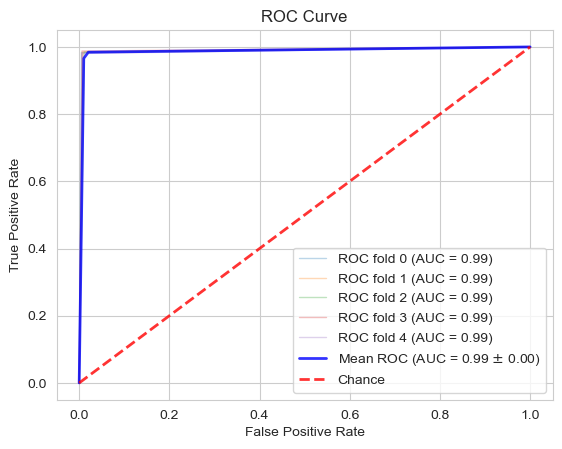

In [179]:
from sklearn.tree import DecisionTreeClassifier

# Loading dataset
df =pd.read_csv('Liver_Patient_Dataset.csv',encoding='unicode_escape')

# 'X' contains features and 'y' contains the target variable
X = df.drop(columns=['Result'])
y = df['Result']

# Encoding target variable to binary format
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Columns to be one-hot encoded and columns to be imputed
categorical_cols = ['Gender of the patient']
numeric_cols = X.select_dtypes(include='number').columns.tolist()

# Preprocessing steps for different column types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initializing Random Forest classifier
clf =DecisionTreeClassifier()

# Initializing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing lists to store ROC curve data
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

# Performing k-fold cross-validation
for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    # Splitting data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_binary[train_idx], y_binary[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Training the classifier on the preprocessed training data
    clf.fit(X_train_preprocessed, y_train)

    # Predicting the target variable on the preprocessed testing data
    y_probs_test = clf.predict_proba(X_test_preprocessed)[:, 1]

    # Calculating ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_probs_test)

    # Interpolating ROC curve to obtain points at fixed intervals
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    # Calculating AUC for this fold
    roc_auc = roc_auc_score(y_test, y_probs_test)
    aucs.append(roc_auc)

    # Plotting ROC curve for this fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

# Calculating mean and standard deviation of ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Plotting mean ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

# Plotting chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Setting labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix and Heatmap

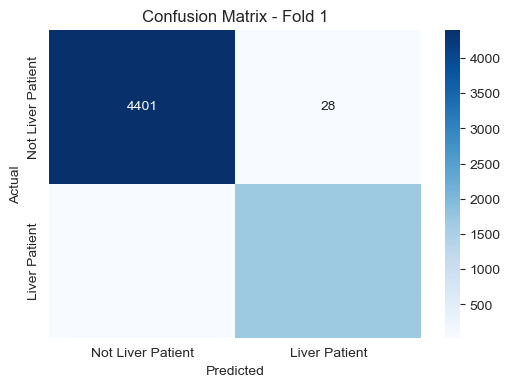

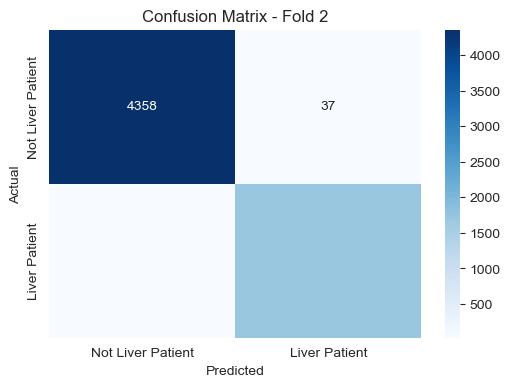

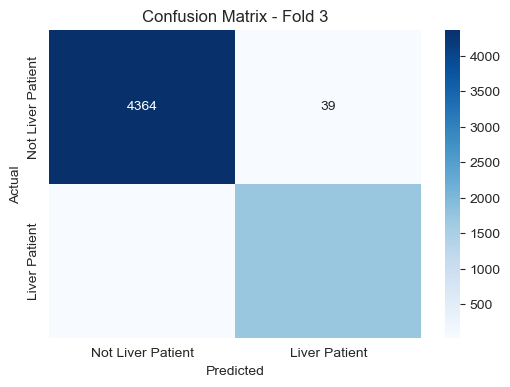

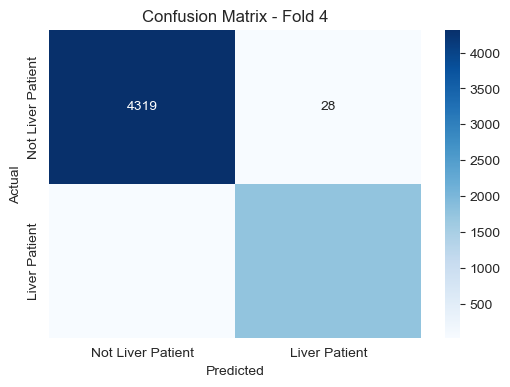

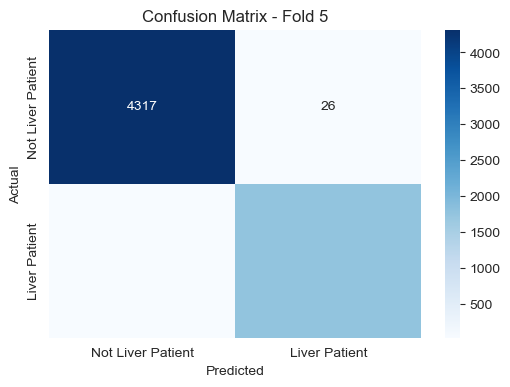

In [180]:
# Initializing lists to store confusion matrices
conf_matrices = []

# Performing k-fold cross-validation
for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    # Splitting data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_binary[train_idx], y_binary[test_idx]

    # Preprocessing the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Training the classifier on the preprocessed training data
    clf.fit(X_train_preprocessed, y_train)

    # Predicting the target variable on the preprocessed testing data
    y_pred = clf.predict(X_test_preprocessed)

    # Calculating confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Creating a heatmap for each confusion matrix
for i, conf_matrix in enumerate(conf_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Not Liver Patient', 'Liver Patient'], 
                yticklabels=['Not Liver Patient', 'Liver Patient'])
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


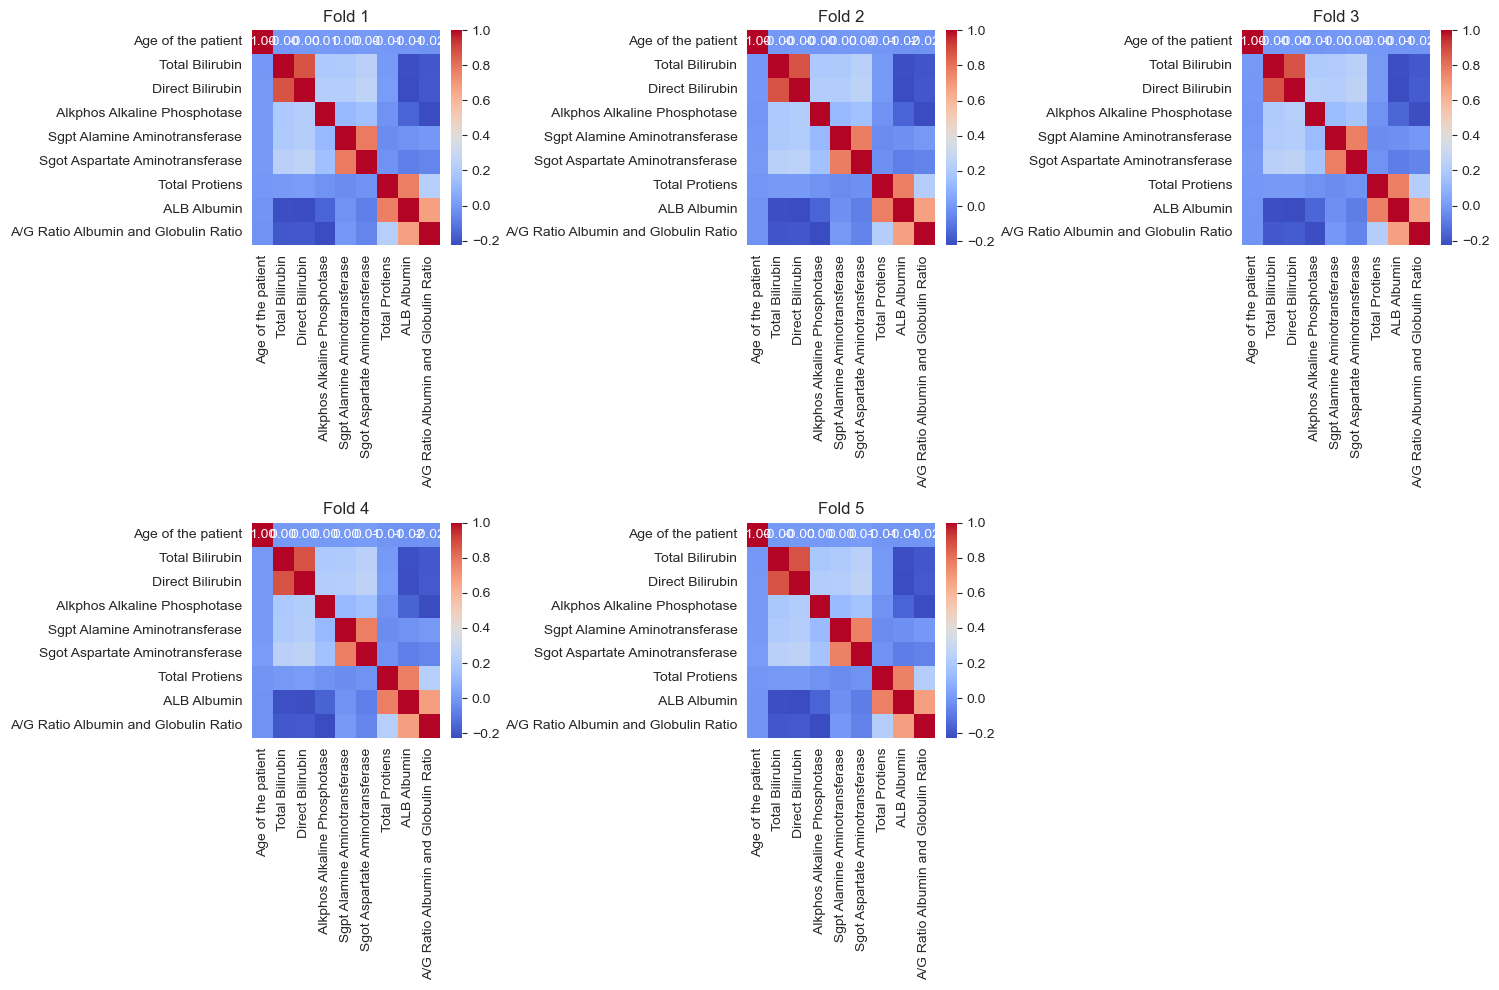

In [181]:
# Plotting heatmaps for each fold
plt.figure(figsize=(15, 10))
for i, corr_matrix in enumerate(corr_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Fold {}'.format(i+1))
plt.tight_layout()
plt.show()

# Model Comparison

In [182]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

# Load dataset
df = pd.read_csv('Liver_Patient_Dataset.csv', encoding='unicode_escape')

# Separate features and target variable
X = df.drop(columns=['Result'])  # Replace 'Result' with the name of your target column
y = df['Result']

# Convert target variable to binary (0 and 1)
y = y.replace({1: 0, 2: 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

# Initialize dictionary to store results
results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create pipeline with preprocessing and classifier
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', clf)])
    
    # Train classifier
    clf_pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = clf_pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred)
    }

# Print results for all classifiers
table = []
for name, result in results.items():
    table.append([name, result['accuracy'], result['classification_report']])

print(tabulate(table, headers=["Classifier", "Accuracy", "Classification Report"], tablefmt="grid"))


+---------------------+------------+-------------------------------------------------------+
| Classifier          |   Accuracy | Classification Report                                 |
+=====================+============+=======================================================+
| Logistic Regression |   0.726666 | precision    recall  f1-score   support               |
|                     |            |                                                       |
|                     |            |            0       0.75      0.93      0.83      4429 |
|                     |            |            1       0.53      0.19      0.28      1710 |
|                     |            |                                                       |
|                     |            |     accuracy                           0.73      6139 |
|                     |            |    macro avg       0.64      0.56      0.56      6139 |
|                     |            | weighted avg       0.69      0.73

### ROC Curve for Model Comparison



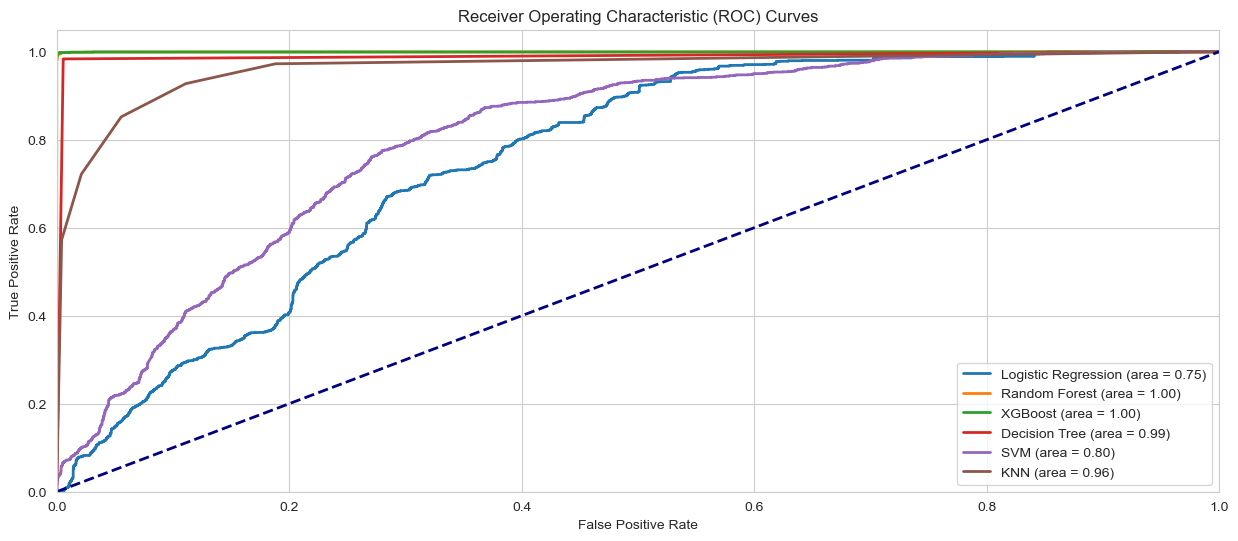

In [183]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Liver_Patient_Dataset.csv', encoding='unicode_escape')

# Separate features and target variable
X = df.drop(columns=['Result'])  # Replace 'Result' with the name of your target column
y = df['Result']

# Convert target variable to binary (0 and 1)
y = y.replace({1: 0, 2: 1})

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# Plot ROC curves for each classifier
plt.figure(figsize=(15, 6))
for name, clf in classifiers.items():
    model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)  # Explicitly specify pos_label
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
